### compile(), fit() 메소드를 사용해서 쉽게 인공신경망 구축하기

위의 예제에서는 SGD를 직접 구현해서 최적화 알고리즘을 구성했다.

Keras API에서 제공하는 여러 메소드를 사용하면, 이러한 최적화 알고리즘을 직접 구성할 필요가 없다.
( Adam, RMSprop, SGD, Momentum ... 언제 구현하노.. )

In [ ]:
# keras로 선형회귀 모델 구현

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(1)

# 클래스를 통해서 인공신경망 구축
# tf.keras.Model 에는 여러 Neural Network의 기본적인 기능이 구현되어 있다.
# 여러 모델 아키텍쳐와 레이어를 쉽게 구축할 수 있다.
# fit(), evaluate(), predict() 등의 메소드를 제공한다.
class LinearRegression(tf.keras.Model): 

    def __init__(self): # initialize model parameters
        super(LinearRegression, self).__init__()
    
        # Dense Layer : Fully-Connected Layer를 설정한다. 즉, 하나의 레이어를 생성한다.
        # fully-connected layer ( thus, dense layer ) 는 입력과 출력 사이의 모든 뉴런이 서로 연결되어 있다.
        # 이는 Weight matrix와 Bias vector를 통해서 선형결합 및 활성화 함수를 통과시킨다.
        # units : 출력 뉴런의 수 ( 1개 레이블 ), input_shape : 입력 뉴런의 수 ( 1개 특성 )
        # activation : 활성화 함수 ( default : None ) 또한 설정 할 수 있다.
        self.dense = tf.keras.layers.Dense(units=1, input_shape=(1,))

        
    # Neural Network의 Forward Pass를 정의 
    # 인스턴스를 호출할 때 입력값을 자동으로 전달한다.
    def call(self, x):
        return self.dense(x)
    

# 콜백 클래스 정의 : 훈련 과정 중간에 호출되는 함수를 이용해서 훈련 과정의 손실함수를 모니터링 할 수 있다.
# 메소드 오버라이딩을 통해서, 추적하고자 하는 정보를 커스텀할 수 있다.
# attribute of keras.callbacks.Callback : model = Reference of the model being trained, params = Dict. parameters
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self): # 훈련 시작시 정보저장용 리스트 호출
        self.losses = []
        
    def on_batch_end(self, logs): # 각 배치마다 손실함수 값 저장
        self.losses.append(logs.get('loss'))

class weightHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self):
        self.weights = []
        self.bias = []
        
    def on_batch_end(self): # 각 배치마다 가중치와 편향 저장
        w, b = self.model.get_weights() # model.get_weights() : 모델의 가중치를 반환한다.
        self.weights.append(w[0])
        self.bias.append(b[0])




# 데이터 생성
X_train = np.arange(10).reshape((10, 1)) # create column vector
Y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

# 특성 표준화 : ( X_train - 평균 ) / 표준편차  ( 평균 0, 표준편차 1 )
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)


# MSE 손실함수
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


# 모델 인스턴스 생성 : 파라미터 정보 및 forward pass를 가지고 있다.
model1 = LinearRegression()


# 앞선 커스텀 콜백의 인스턴스를 생성한다.
loss_history = LossHistory()
weight_history = weightHistory()

# 모델 컴파일 : 손실함수 및 최적화 알고리즘 설정
# metrics는 최적화 과정에 영향을 주지 않는다. : 모델 성능을 평가하기 위한 지표
# metrics=['mae', 'mse'] : 평균 절대 오차, 평균 제곱 오차
model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=loss_fn, metrics=['mae', 'mse'])

# 모델 훈련 : 학습 데이터셋을 이용하여 모델을 학습한다.
# epochs : 에포크 수, batch_size : 배치 사이즈
# verbose : 학습중 관련 정보 출력 여부 (0 : 출력 안함, 1 : 출력함)
model1.fit(X_train_norm, Y_train, epochs=100, batch_size=1 , verbose=1, callbacks=[loss_history, weight_history])




Epoch 1/100


/home/minseok/miniconda3/envs/minseok/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 28.2085 - mae: 4.2025 - mse: 28.2085
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.9076 - mae: 3.4569 - mse: 18.9076
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.7158 - mae: 2.8523 - mse: 12.7158
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5913 - mae: 2.3700 - mse: 8.5913 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8420 - mae: 1.9826 - mse: 5.8420 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.0078 - mae: 1.6668 - mse: 4.0078
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.7827 - mae: 1.4095 - mse: 2.7827
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9633 - mae: 1.1998 - mse: 1.9633  
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4145 - mae: 1.0428 - mse: 1.4145 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0462 - mae: 0.9159 - mse: 1.0462 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

W = [[2.7240849]], b = [4.9556704]


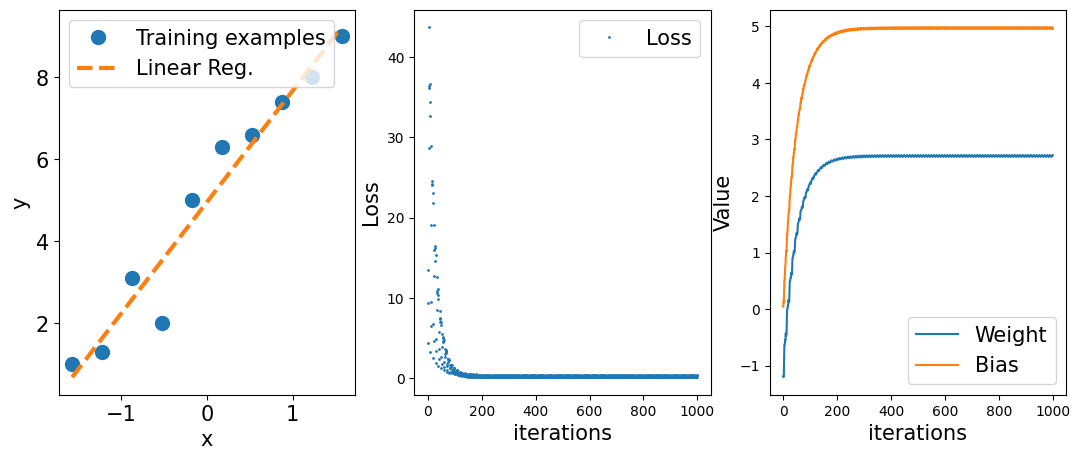

In [12]:
# 최종 학습 결과 출력

W,b = model1.get_weights() # 학습된 가중치와 편향 출력
print(f'W = {W}, b = {b}')

# 시각화 및 결과 출력

X_test = np.linspace(0, 9, num=100).reshape(-1, 1) # 테스트 데이터 생성 : -1~1 사이의 100개의 데이터 생성
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train) # 테스트 데이터 표준화

Y_pred = model1(tf.cast(X_test_norm, dtype=tf.float32)) # 예측값 생성 : 모델에 테스트 데이터를 넣어 예측 회귀선 생성

fig = plt.figure(figsize=(13, 5))

# 1행 2열의 그래프 생성, 1번 그래프 : 훈련 데이터와 예측 회귀선
ax = fig.add_subplot(1, 3, 1)
plt.plot(X_train_norm, Y_train, 'o', markersize=10) # 훈련 데이터
plt.plot(X_test_norm, Y_pred, '--', lw=3) # 예측 회귀선
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# 1행 2열의 그래프 생성, 2번 그래프 : 손실함수 그래프
ax = fig.add_subplot(1, 3, 2)
plt.plot(loss_history.losses,'o', markersize=1, label='Loss', )
plt.legend(fontsize=15)
plt.xlabel('iterations', size=15)
plt.ylabel('Loss', size=15)

# 가중치 및 편향 변화 그래프
ax = fig.add_subplot(1, 3, 3)
plt.plot(weight_history.weights, label='Weight')
plt.plot(weight_history.bias, label='Bias')
plt.legend(fontsize=15)
plt.xlabel('iterations', size=15)
plt.ylabel('Value', size=15)


plt.show()

### keras.Sequential을 이용해서 MLP 구현하기 ( with activation function )

다층 퍼셉트론에서 여러 hidden layer를 기존 방식으로 쌓으면 내 모델 클래스의 레이어와 forward pass 가 난잡해진다.

이를 해결하기위해서, 고수준의 Sequential 메소드를 이용하면, 가독성 있게 다층퍼셉트론을 관리할 수 있다.

In [50]:
# iris 데이터셋을 이용한 다중 클래스 분류 모델 구현
import tensorflow as tf
import numpy as np
from tensorflow.keras import regularizers

import tensorflow_datasets as tfds
print(len(tfds.list_builders())) # 사용가능한 데이터셋의 개수 출력

1296


In [44]:
# iris 데이터셋 로드

iris, iris_info= tfds.load('iris', with_info=True) # iris 데이터셋 로드


# 데이터셋 구조 보기
# 150개의 딕셔너리 형태로 되어있으며, 각 딕셔너리는 features와 label로 구성되어 있다.
for i , item in enumerate(iris['train']):
    if i >=5:
        break
    print(item['features'].numpy(), item['label'].numpy())



[5.1 3.4 1.5 0.2] 0
[7.7 3.  6.1 2.3] 2
[5.7 2.8 4.5 1.3] 1
[6.8 3.2 5.9 2.3] 2
[5.2 3.4 1.4 0.2] 0


2025-02-01 00:01:34.143841: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [22]:
# 데이터셋 분할
tf.random.set_seed(1)

# iris 데이터는 딕셔너리로 이루어져 있고, 'train' 키만 존재한다.
# iris['train'] , 'features'와 'label' 키를 가지고 있다.
# ds_orig 는 데이터셋으로, take() 메소드를 통해서만 데이터를 추출할 수 있다.
ds_orig = iris['train'] 

# 데이터셋 섞기
# reshuffle_each_iteration=False : 데이터셋을 한번 섞고, 그 이후 반복에서는 데이터셋을 섞지 않는다.
# 즉, 위 파라미터가 True이면, 반복문을 사용해서 ds_orig를 여러번 사용할 때마다 데이터셋이 섞인다.
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)

# 데이터 추출, 훈련데이터셋과 테스트 데이터셋으로 나누기
ds_train_orig = ds_orig.take(100) # 처음 100개의 데이터셋을 훈련 데이터셋으로 사용
ds_test = ds_orig.skip(100) # 처음 100개를 건너뛰고 나머지 데이터셋(50개)을 테스트 데이터셋으로 사용

# 데이터셋 데이터타입 변경 ( 딕셔너리 -> 튜플 )
# map() 메소드는 함수를 가져와서, 그 함수로 주어진 데이터셋의 요소를 변환한다.
# 여기서는, 딕셔너리 구조를 튜플 구조로 바꿔준다.
ds_train_orig = ds_train_orig.map(lambda x: (x['features'], x['label']))
ds_test = ds_test.map(lambda x: (x['features'], x['label']))


##### 데이터셋 구조 잠깐 확인하기

아래와 같은 150개의 딕셔너리의 세트는 위에서 정의한 ds_train_orig 의 구조랑 유사하게 조직되어 있다.
```python
{'features': [1,2,3,4] , 'label' : 0}  # 1번 딕셔너리 = 1번 iris
{'features': [4,3,2,4] , 'label' : 1}  # 2번 딕셔너리 = 2번 iris
...
{'features': [4,6,2,7] , 'label' : 0}  # 150번 딕셔너리 = 150번 iris
```

위의 .map() 메소드는, 이 데이터셋의 각 딕셔너리를 x로 받고,
```python
(x['features'] , x['label']) = ([1,2,3,4] , 0)
=>
([1,2,3,4],0)  # iris 1
([4,3,2,4],1)  # iris 2
...
([4,6,2,7],0)  # iris 150
```

이런 구조로 맵핑해준다.

In [55]:
# Neural Network 모델 구현

# Sequential 클래스를 통해서 모델을 구축한다.

model_iris = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', name='fc1', input_shape=(4,), kernel_regularizer=regularizers.l2(0.01)),     
    tf.keras.layers.Dense(16, name='fc2', activation='relu',kernel_regularizer=regularizers.l2(0.01)),   
    tf.keras.layers.Dense(3, name='output', activation= 'softmax')                   
])

model_iris.summary() # 모델 요약 출력

# 모델 컴파일 : 손실함수, 최적화 알고리즘 설정
# sparse_categorical_crossentropy : 다중 클래스 분류 손실함수 (레이블 들이 정수로 되어있다.)
# categorical_crossentropy : 다중 클래스 분류 손실함수 ( 레이블이 이미 one-hot encoding 되어있다.)
model_iris.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 하이퍼 파라미터 설정
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = int(np.ceil(training_size / batch_size)) # 1에포크당 반복횟수

# 배치 설정
ds_train = ds_train_orig.shuffle(buffer_size=training_size) # 튜플 100개로 이루어진 데이터셋에서 100개 튜플들의 순서를 섞는다. = iris 샘플순서를 섞는다.
ds_train = ds_train.repeat() # 데이터셋 100개를 계속해서 반복해서 데이터셋 구성한다.
ds_train = ds_train.batch(batch_size=batch_size) # 배치 사이즈 설정
ds_train = ds_train.prefetch(buffer_size=1000) # 데이터를 미리 로드하여 속도를 높인다.

# 모델 훈련
history = model_iris.fit(ds_train, epochs=num_epochs, steps_per_epoch=steps_per_epoch, verbose=1)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 739 (2.89 KB)

 Trainable params: 739 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3641 - loss: 1.6954
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2990 - loss: 1.3229
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6467 - loss: 1.1759
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7360 - loss: 1.0198
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6651 - loss: 0.9517
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7807 - loss: 0.7780
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7197 - loss: 0.7131
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7542 - loss: 0.6335
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8019 - loss: 0.5161
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8001 - loss: 0.5128
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8285 - loss: 0.5057
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

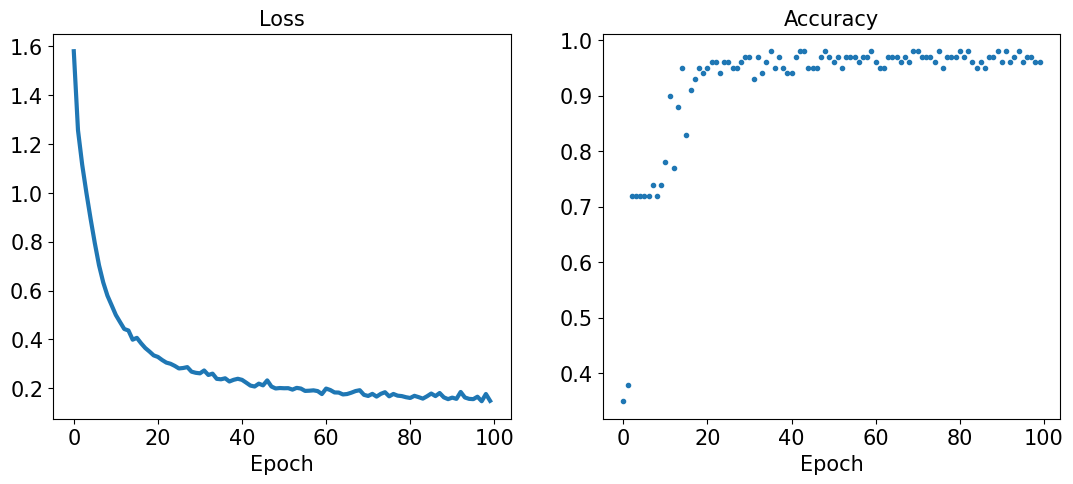

In [59]:
# 훈련 결과 출력
# history 객체에는 손실함수 값과 정확도 값이 저장되어 있다.
hist = history.history

# 시각화
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], 'o', markersize=3)
ax.set_title('Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()


### 테스트 데이터셋으로 훈련된 모델 평가해보기